In [41]:
import numpy as np 
import pandas as pd 


# *Preprocessing*


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [43]:
df = pd.read_csv('/kaggle/input/weather-data900/NM Weather Data in India from 1901 to 2017 - Weather Data in India from 1901 to 2017.csv')

In [44]:
df

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [45]:
df.shape

(117, 14)

In [46]:
df.columns

Index(['ID', 'YEAR', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12'],
      dtype='object')

In [47]:
df.isnull().sum()

ID      0
YEAR    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
dtype: int64

In [48]:
df.describe()

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


# *Prediction using ANN*

In [49]:
df1 = df.iloc[:, 2:]

In [50]:
df1 = df1.transpose()
df1.shape
df1

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
1,17.99,19.00,18.32,17.77,17.40,17.50,19.27,18.35,17.79,18.14,...,18.49,19.79,19.15,18.32,18.25,18.88,18.81,19.02,20.92,20.59
2,19.43,20.39,19.79,19.39,17.79,19.14,19.42,19.73,19.05,19.72,...,19.83,21.66,21.23,20.79,20.43,21.07,20.35,21.23,23.58,23.08
3,23.49,24.10,22.46,22.95,21.78,22.21,22.03,22.93,23.40,22.90,...,24.43,24.55,26.53,24.11,23.98,24.53,23.34,23.52,26.61,25.58
4,26.41,26.54,26.03,26.73,24.84,26.53,26.98,27.06,25.76,25.96,...,26.54,27.35,28.40,26.10,26.89,26.97,26.91,26.52,29.56,29.17
5,28.28,28.68,27.93,27.83,28.32,29.06,27.52,28.07,27.97,28.36,...,28.42,28.71,29.19,28.92,28.72,29.06,28.45,28.82,30.41,30.47
6,28.60,28.44,28.41,27.85,28.69,28.02,27.66,28.49,27.67,27.72,...,28.10,28.77,28.51,28.60,28.91,28.24,29.42,28.15,29.70,29.44
7,27.49,27.29,28.04,26.84,27.67,27.46,27.28,27.16,26.56,26.93,...,27.50,27.83,27.55,27.60,27.98,27.50,28.07,28.03,28.18,28.31
8,26.98,27.05,26.63,26.73,27.47,26.82,26.38,26.41,26.43,26.61,...,27.00,27.85,27.33,27.20,27.31,27.22,27.42,27.64,28.17,28.12
9,26.26,25.95,26.34,25.84,26.29,26.23,26.26,25.74,25.47,25.98,...,26.44,27.11,26.60,26.70,26.65,26.87,26.61,27.04,27.72,28.11
10,25.08,24.37,24.57,24.36,26.16,24.75,24.72,24.25,24.37,24.04,...,25.47,25.20,25.58,25.51,24.85,25.63,25.38,25.82,26.81,27.24


In [51]:
X = pd.DataFrame(df1.iloc[:,:-1])
y = pd.DataFrame(df1.iloc[:,-1:])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
#Build a simple Sequential model
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 12)             │         1,404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,417 (5.54 KB)

 Trainable params: 1,417 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
#Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [56]:
#Make predictions on the test set
y_pred = model.predict(X_test)

#Calculate and print the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("ROOT MEAN SQUARED ERROR =", rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
ROOT MEAN SQUARED ERROR = 0.8260942632564973


In [57]:
#Calculate and print Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =", mae)

MEAN ABSOLUTE ERROR = 0.730425682067871


In [58]:
predictions = model.predict(df1.iloc[:, 1:117])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[20.142616],
       [22.036165],
       [24.416368],
       [27.939194],
       [29.883497],
       [30.632097],
       [29.687185],
       [28.963095],
       [28.410799],
       [26.13617 ],
       [23.426455],
       [20.44359 ]], dtype=float32)

In [59]:
result = pd.DataFrame({'ID': range(0, 12),'Month' : range(1,13)})
result['Prediction'] = predictions
result['Year'] = 2018

In [60]:
result

,ID,Month,Prediction,Year
0,0,1,20.142616,2018
1,1,2,22.036165,2018
2,2,3,24.416368,2018
3,3,4,27.939194,2018
4,4,5,29.883497,2018
5,5,6,30.632097,2018
6,6,7,29.687185,2018
7,7,8,28.963095,2018
8,8,9,28.410799,2018
9,9,10,26.136169,2018


In [61]:
result.to_csv('outputs.csv', index=False)

# *EDA*

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [63]:
data = pd.read_csv('/kaggle/input/weather-data900/NM Weather Data in India from 1901 to 2017 - Weather Data in India from 1901 to 2017.csv')

In [64]:
data

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [65]:
data.drop(['ID'], axis = 1, inplace = True)

In [66]:
data.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [67]:
data.columns

Index(['YEAR', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

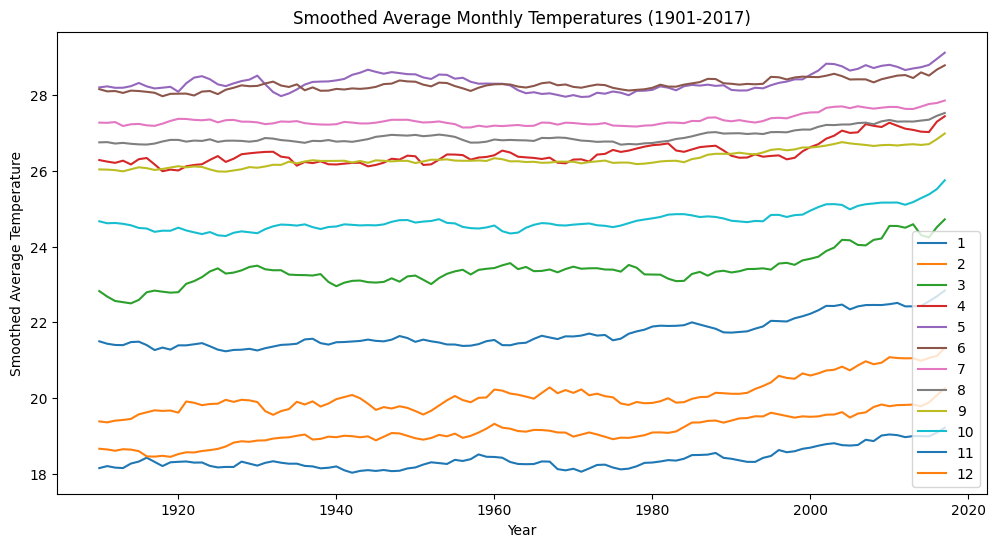

In [68]:
plt.figure(figsize=(12, 6))
for month in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']:
    plt.plot(data['YEAR'], data[month].rolling(window=10).mean(), label=month)

plt.xlabel('Year')
plt.ylabel('Smoothed Average Temperature')
plt.title('Smoothed Average Monthly Temperatures (1901-2017)')
plt.legend()
plt.show()

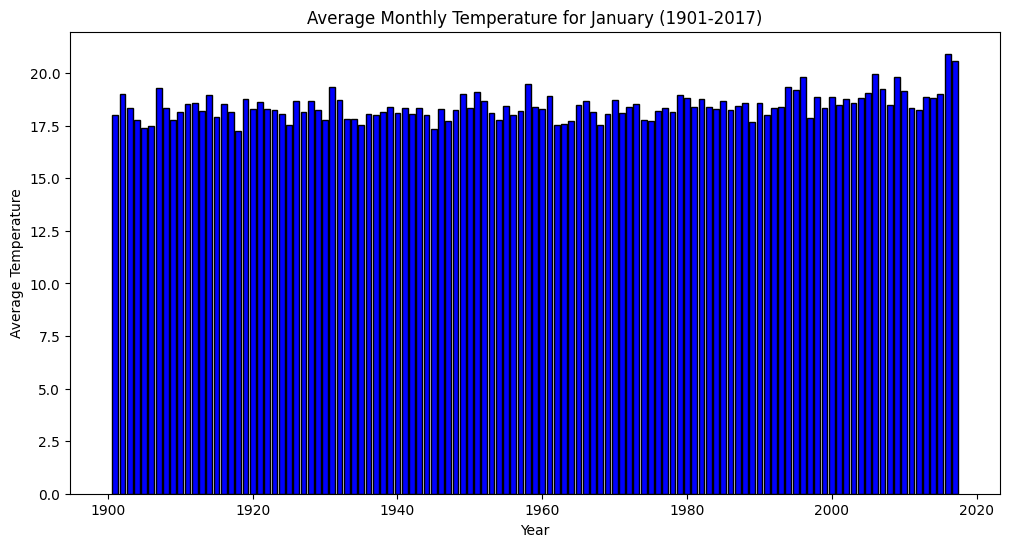

In [69]:
#Plotting the average temperature for January over the years
plt.figure(figsize=(12, 6))

#Selecting data for January ('1' column)
selected_data = data[['YEAR', '1']]

#Plotting the bar chart
plt.bar(selected_data['YEAR'], selected_data['1'], color='blue', edgecolor='black')

#Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Monthly Temperature for January (1901-2017)')

#Show the plot
plt.show()


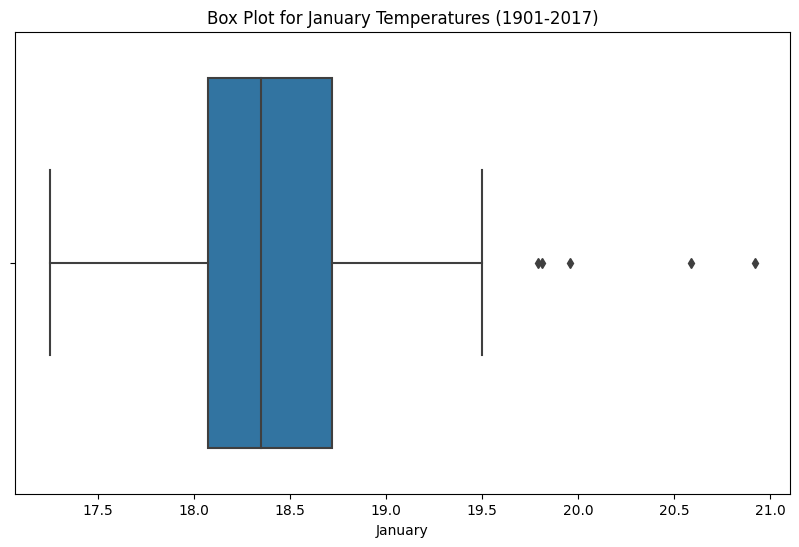

In [70]:
#Example for January
plt.figure(figsize=(10, 6))
sns.boxplot(x='1', data=data)
plt.title('Box Plot for January Temperatures (1901-2017)')
plt.xlabel('January')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

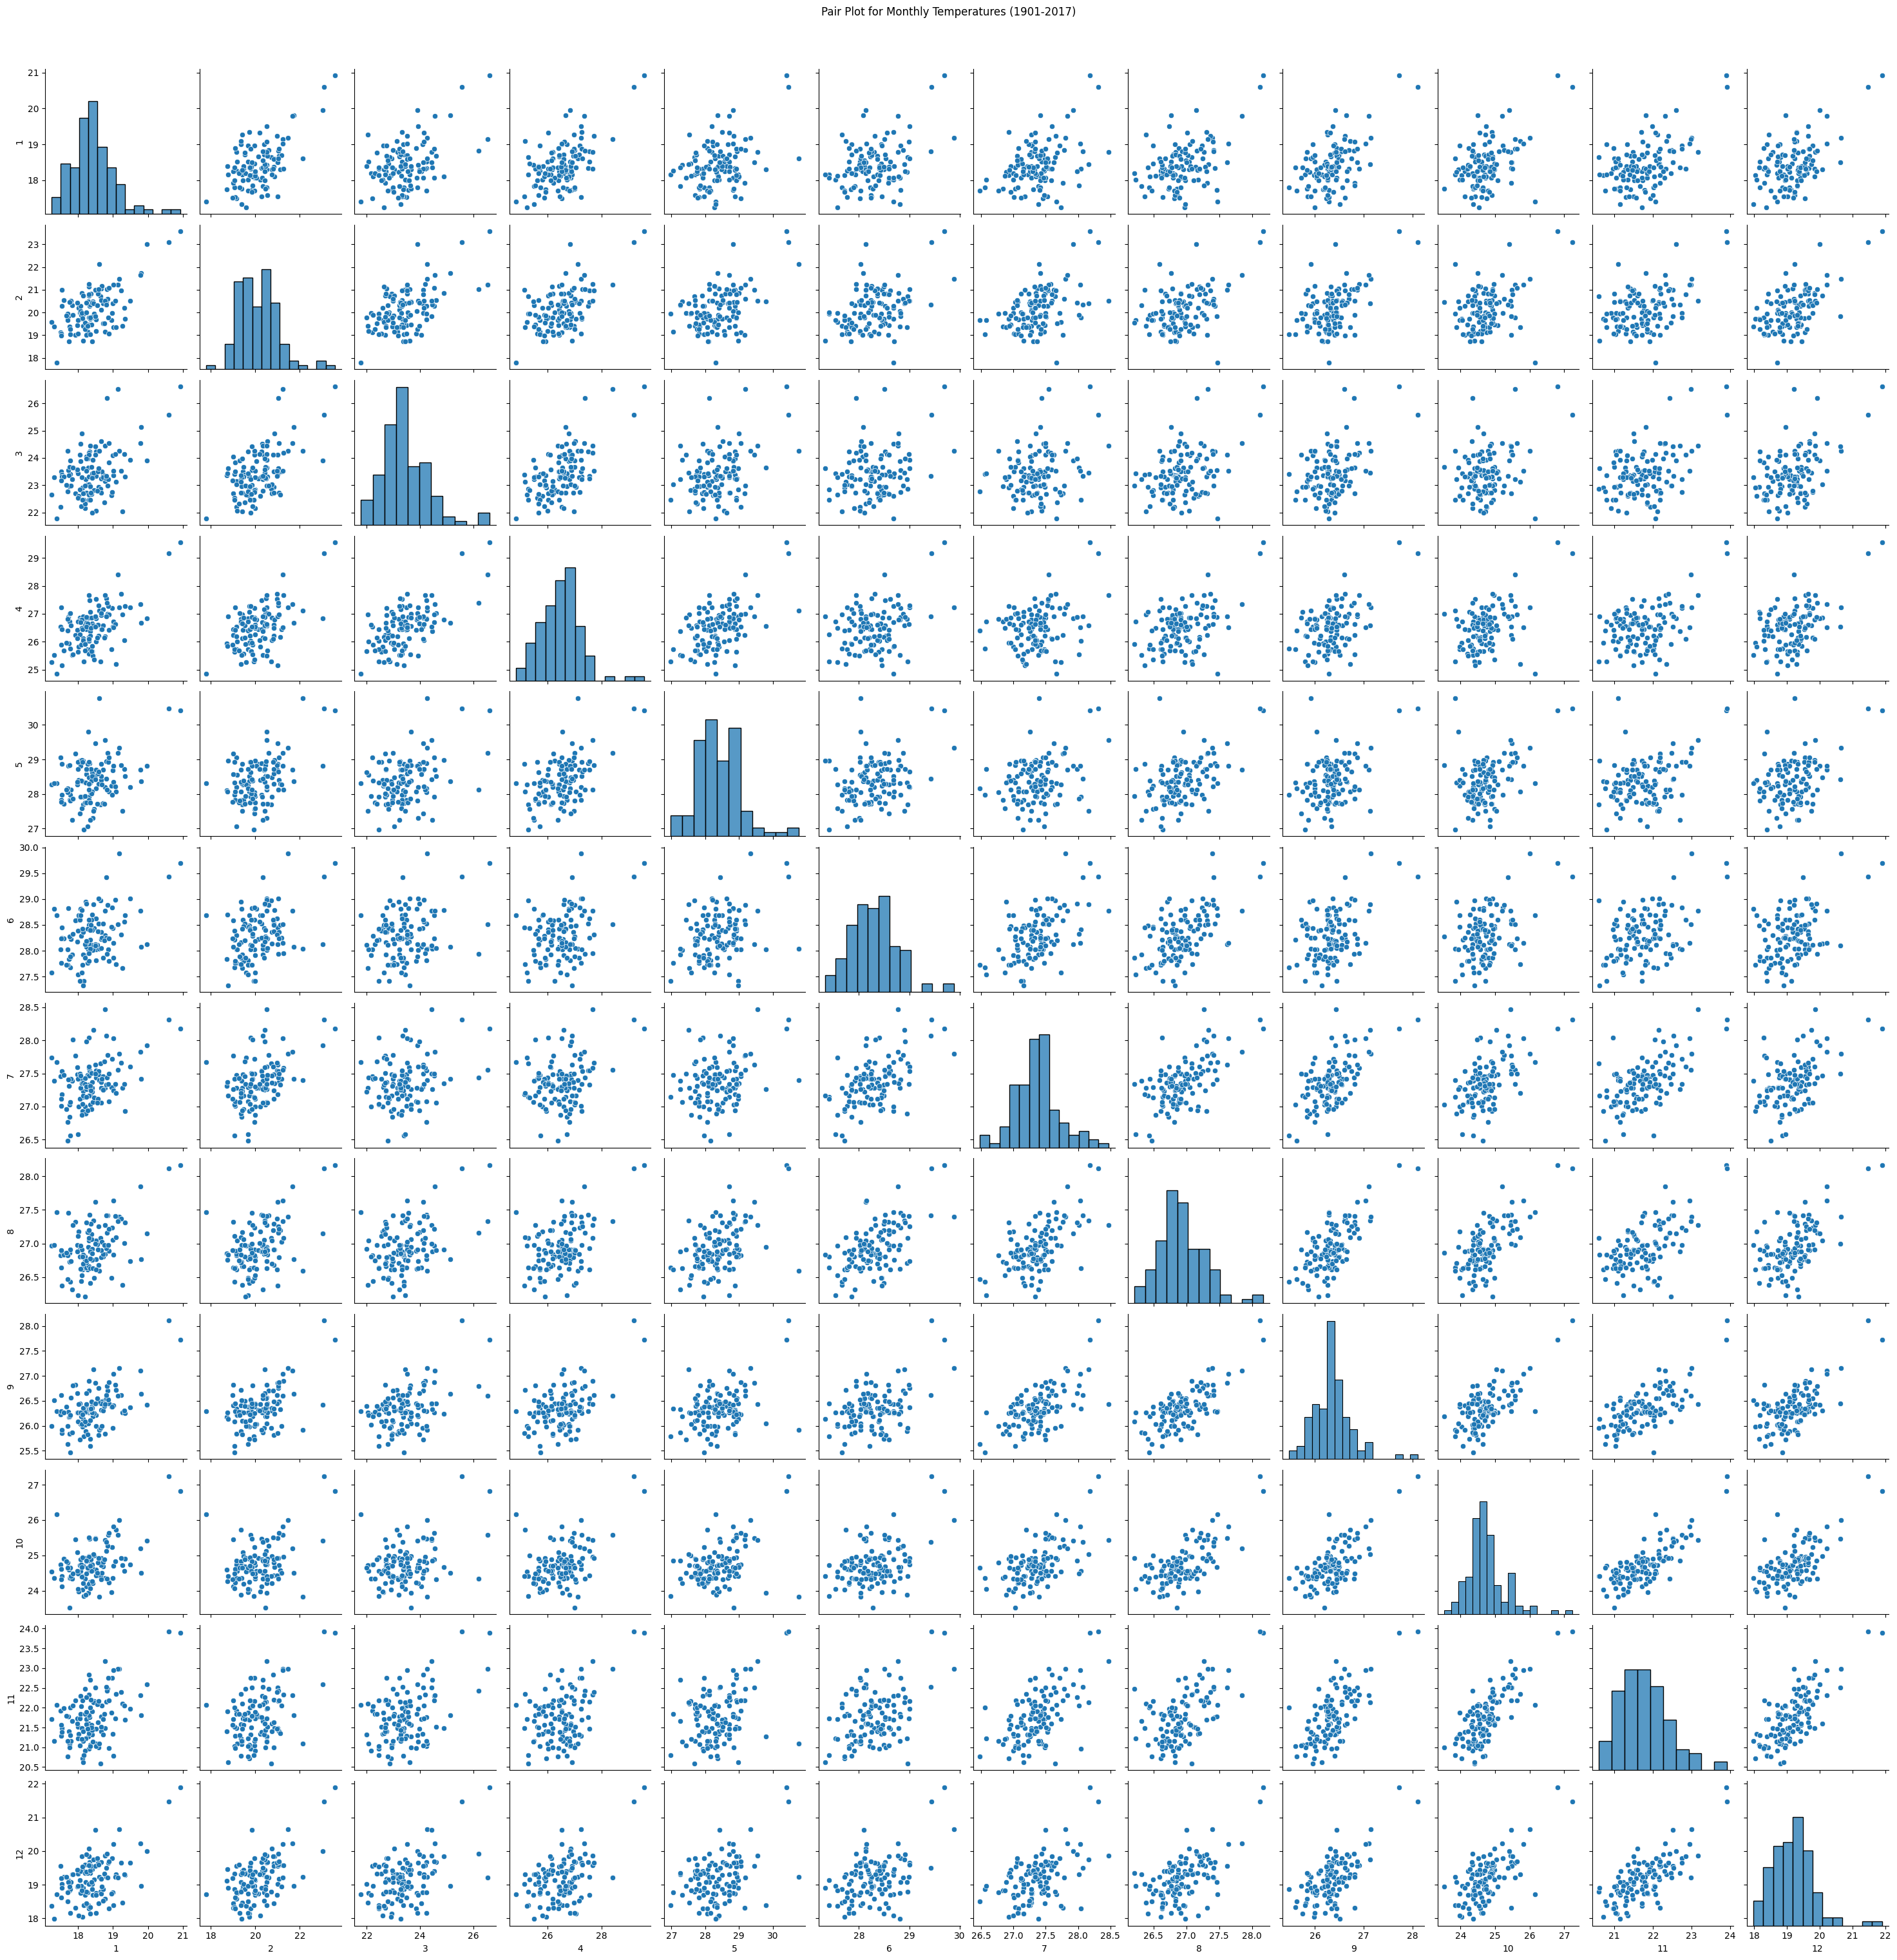

In [71]:
#heatmap to visualize the correlation matrix between months. using seaborn pairplot
sns.pairplot(data[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']])
plt.suptitle('Pair Plot for Monthly Temperatures (1901-2017)', y=1.02)
plt.show()

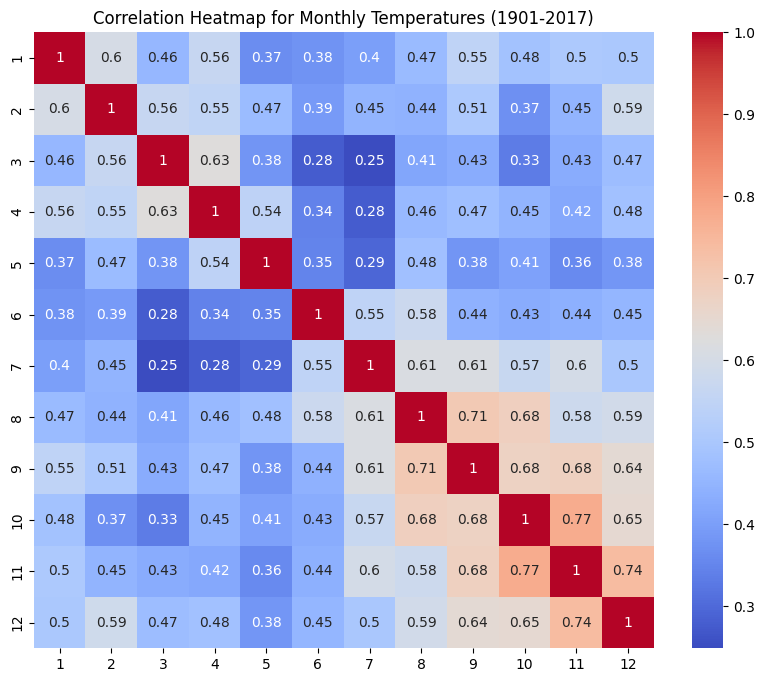

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Monthly Temperatures (1901-2017)')
plt.show()